In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("./spamSMS.csv", encoding='ISO-8859-1').iloc[:,:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
text_vectorized = vectorizer.fit_transform(df.iloc[:, 1])  # Assuming text is in the second column
vectorized_df = pd.DataFrame(text_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_df.head()


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Assuming you've already loaded your DataFrame df and performed text vectorization to get text_vectorized

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text column
text_vectorized = vectorizer.fit_transform(df.iloc[:, 1])  # Assuming text is in the second column

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.iloc[:, 0])  # Assuming labels are in the first column


# Example usage:
# Your_X = text_vectorized
# Your_y = y


In [21]:
text_vectorized.toarray().shape

(5572, 8672)

In [22]:
y.shape

(5572,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vectorized, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 5,10],
    'gamma': [0.1, 0.5, 1, 5]
}

# Initialize SVM classifier
svm = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best estimator from the grid search
best_svm = grid_search.best_estimator_

# Predict on the training set
y_pred_train = best_svm.predict(X_train)

# Calculate accuracy and loss for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
loss_train = log_loss(y_train, y_pred_train)

# Predict on the validation set
y_pred_val = best_svm.predict(X_test)

# Calculate accuracy and loss for the validation set
accuracy_val = accuracy_score(y_test, y_pred_val)
loss_val = log_loss(y_test, y_pred_val)

# Print best parameters and metrics
print("Best Parameters:", best_params)
print("Training Accuracy:", accuracy_train)
print("Training Loss:", loss_train)
print("Validation Accuracy:", accuracy_val)
print("Validation Loss:", loss_val)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Training Accuracy: 1.0
Training Loss: 2.2204460492503136e-16
Validation Accuracy: 0.979372197309417
Validation Loss: 0.7435013703584706


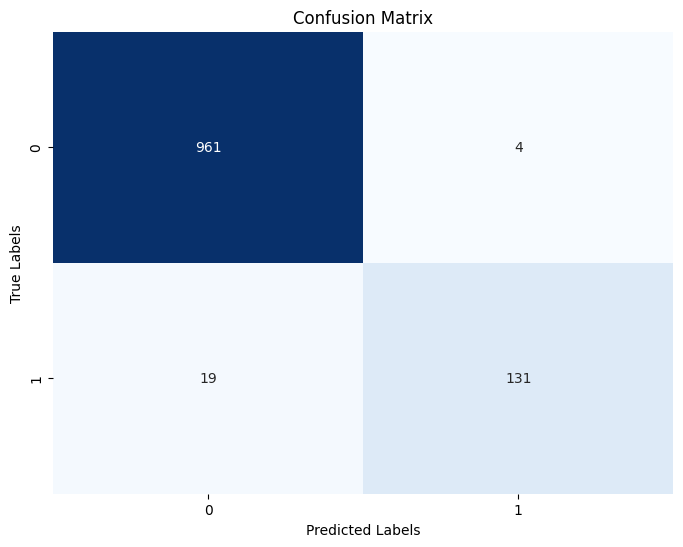

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for validation set
conf_matrix = confusion_matrix(y_test, y_pred_val)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
